In [1]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

In [2]:
input_csv = "../results-yasmin/math.csv"
baseline = "x86_64,qemu,qemu"
base_arch, base_runtime, base_tag = baseline.split(',')
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,threads,unit,value,retval,runtime,tag
0,aarch64,micro.math-sqrt,/home/redha/benchmarks/math/math,none,1.0,ops/ms,141658.432841,0,native,native
1,aarch64,micro.math-sin,/home/redha/benchmarks/math/math,none,1.0,ops/ms,4934.394450,0,native,native
2,aarch64,micro.math-cos,/home/redha/benchmarks/math/math,none,1.0,ops/ms,4917.236420,0,native,native
3,aarch64,micro.math-tan,/home/redha/benchmarks/math/math,none,1.0,ops/ms,3861.299475,0,native,native
4,aarch64,micro.math-asin,/home/redha/benchmarks/math/math,none,1.0,ops/ms,30122.235350,0,native,native
...,...,...,...,...,...,...,...,...,...,...
130,x86_64,micro.math-asin,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,10368.599335,0,qemu,risotto
131,x86_64,micro.math-acos,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,10491.607941,0,qemu,risotto
132,x86_64,micro.math-atan,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,10553.804594,0,qemu,risotto
133,x86_64,micro.math-exp,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,13949.517423,0,qemu,risotto


In [3]:
base_df = df.loc[df['tag'] == 'qemu']
base_df

,arch,bench,cmdline,dataset,threads,unit,value,retval,runtime,tag
45,x86_64,micro.math-sqrt,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,27584.253041,0,qemu,qemu
46,x86_64,micro.math-sin,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,376.637377,0,qemu,qemu
47,x86_64,micro.math-cos,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,369.770601,0,qemu,qemu
48,x86_64,micro.math-tan,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,305.353107,0,qemu,qemu
49,x86_64,micro.math-asin,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,1246.833117,0,qemu,qemu
50,x86_64,micro.math-acos,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,1247.414365,0,qemu,qemu
51,x86_64,micro.math-atan,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,1248.135371,0,qemu,qemu
52,x86_64,micro.math-exp,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,4529.425972,0,qemu,qemu
53,x86_64,micro.math-log,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,2520.436479,0,qemu,qemu
54,x86_64,micro.math-sqrt,/home/redha/benchmarks/math-x86_64/math,none,1.0,ops/ms,27304.733218,0,qemu,qemu


In [4]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()
base_means

{'micro.math-exp': 4542.9287,
 'micro.math-log': 2523.564,
 'micro.math-tan': 306.37152,
 'micro.math-sqrt': 27391.781,
 'micro.math-acos': 1251.68,
 'micro.math-sin': 377.04047,
 'micro.math-cos': 371.62482,
 'micro.math-atan': 1252.0413,
 'micro.math-asin': 1251.5979}

In [5]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

,bench,qemu,risotto,native
0,micro.math-acos,1251.680097,10442.580897,30217.823391
1,micro.math-asin,1251.597973,10318.622067,30205.830657
2,micro.math-atan,1252.041221,10493.826381,30234.324487
3,micro.math-cos,371.624783,3730.937692,4921.815560
4,micro.math-exp,4542.928858,14075.178269,112850.191017
5,micro.math-log,2523.564093,13314.642277,55068.365988
6,micro.math-sin,377.040470,3728.461825,4941.211067
7,micro.math-sqrt,27391.783819,27217.364034,141721.314158
8,micro.math-tan,306.371512,3033.902801,3875.042467


In [6]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        dct['bench'] = dct['bench'][11:]
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,aarch64,sqrt,none,1.0,ops/ms,141658.432841,native,native,5.171567,native,0.0
1,aarch64,sin,none,1.0,ops/ms,4934.394450,native,native,13.087175,native,0.0
2,aarch64,cos,none,1.0,ops/ms,4917.236420,native,native,13.231722,native,0.0
3,aarch64,tan,none,1.0,ops/ms,3861.299475,native,native,12.603324,native,0.0
4,aarch64,asin,none,1.0,ops/ms,30122.235350,native,native,24.067023,native,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85,x86_64,asin,none,1.0,ops/ms,10368.599335,qemu,risotto,8.284289,risotto,0.0
86,x86_64,acos,none,1.0,ops/ms,10491.607941,qemu,risotto,8.382021,risotto,0.0
87,x86_64,atan,none,1.0,ops/ms,10553.804594,qemu,risotto,8.429279,risotto,0.0
88,x86_64,exp,none,1.0,ops/ms,13949.517423,qemu,risotto,3.070600,risotto,0.0


In [7]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [8]:
max(df_norm['norm'].values)
df_norm.loc[df_norm['bench'] == 'log']['norm'].values.mean()

13.548895375234531

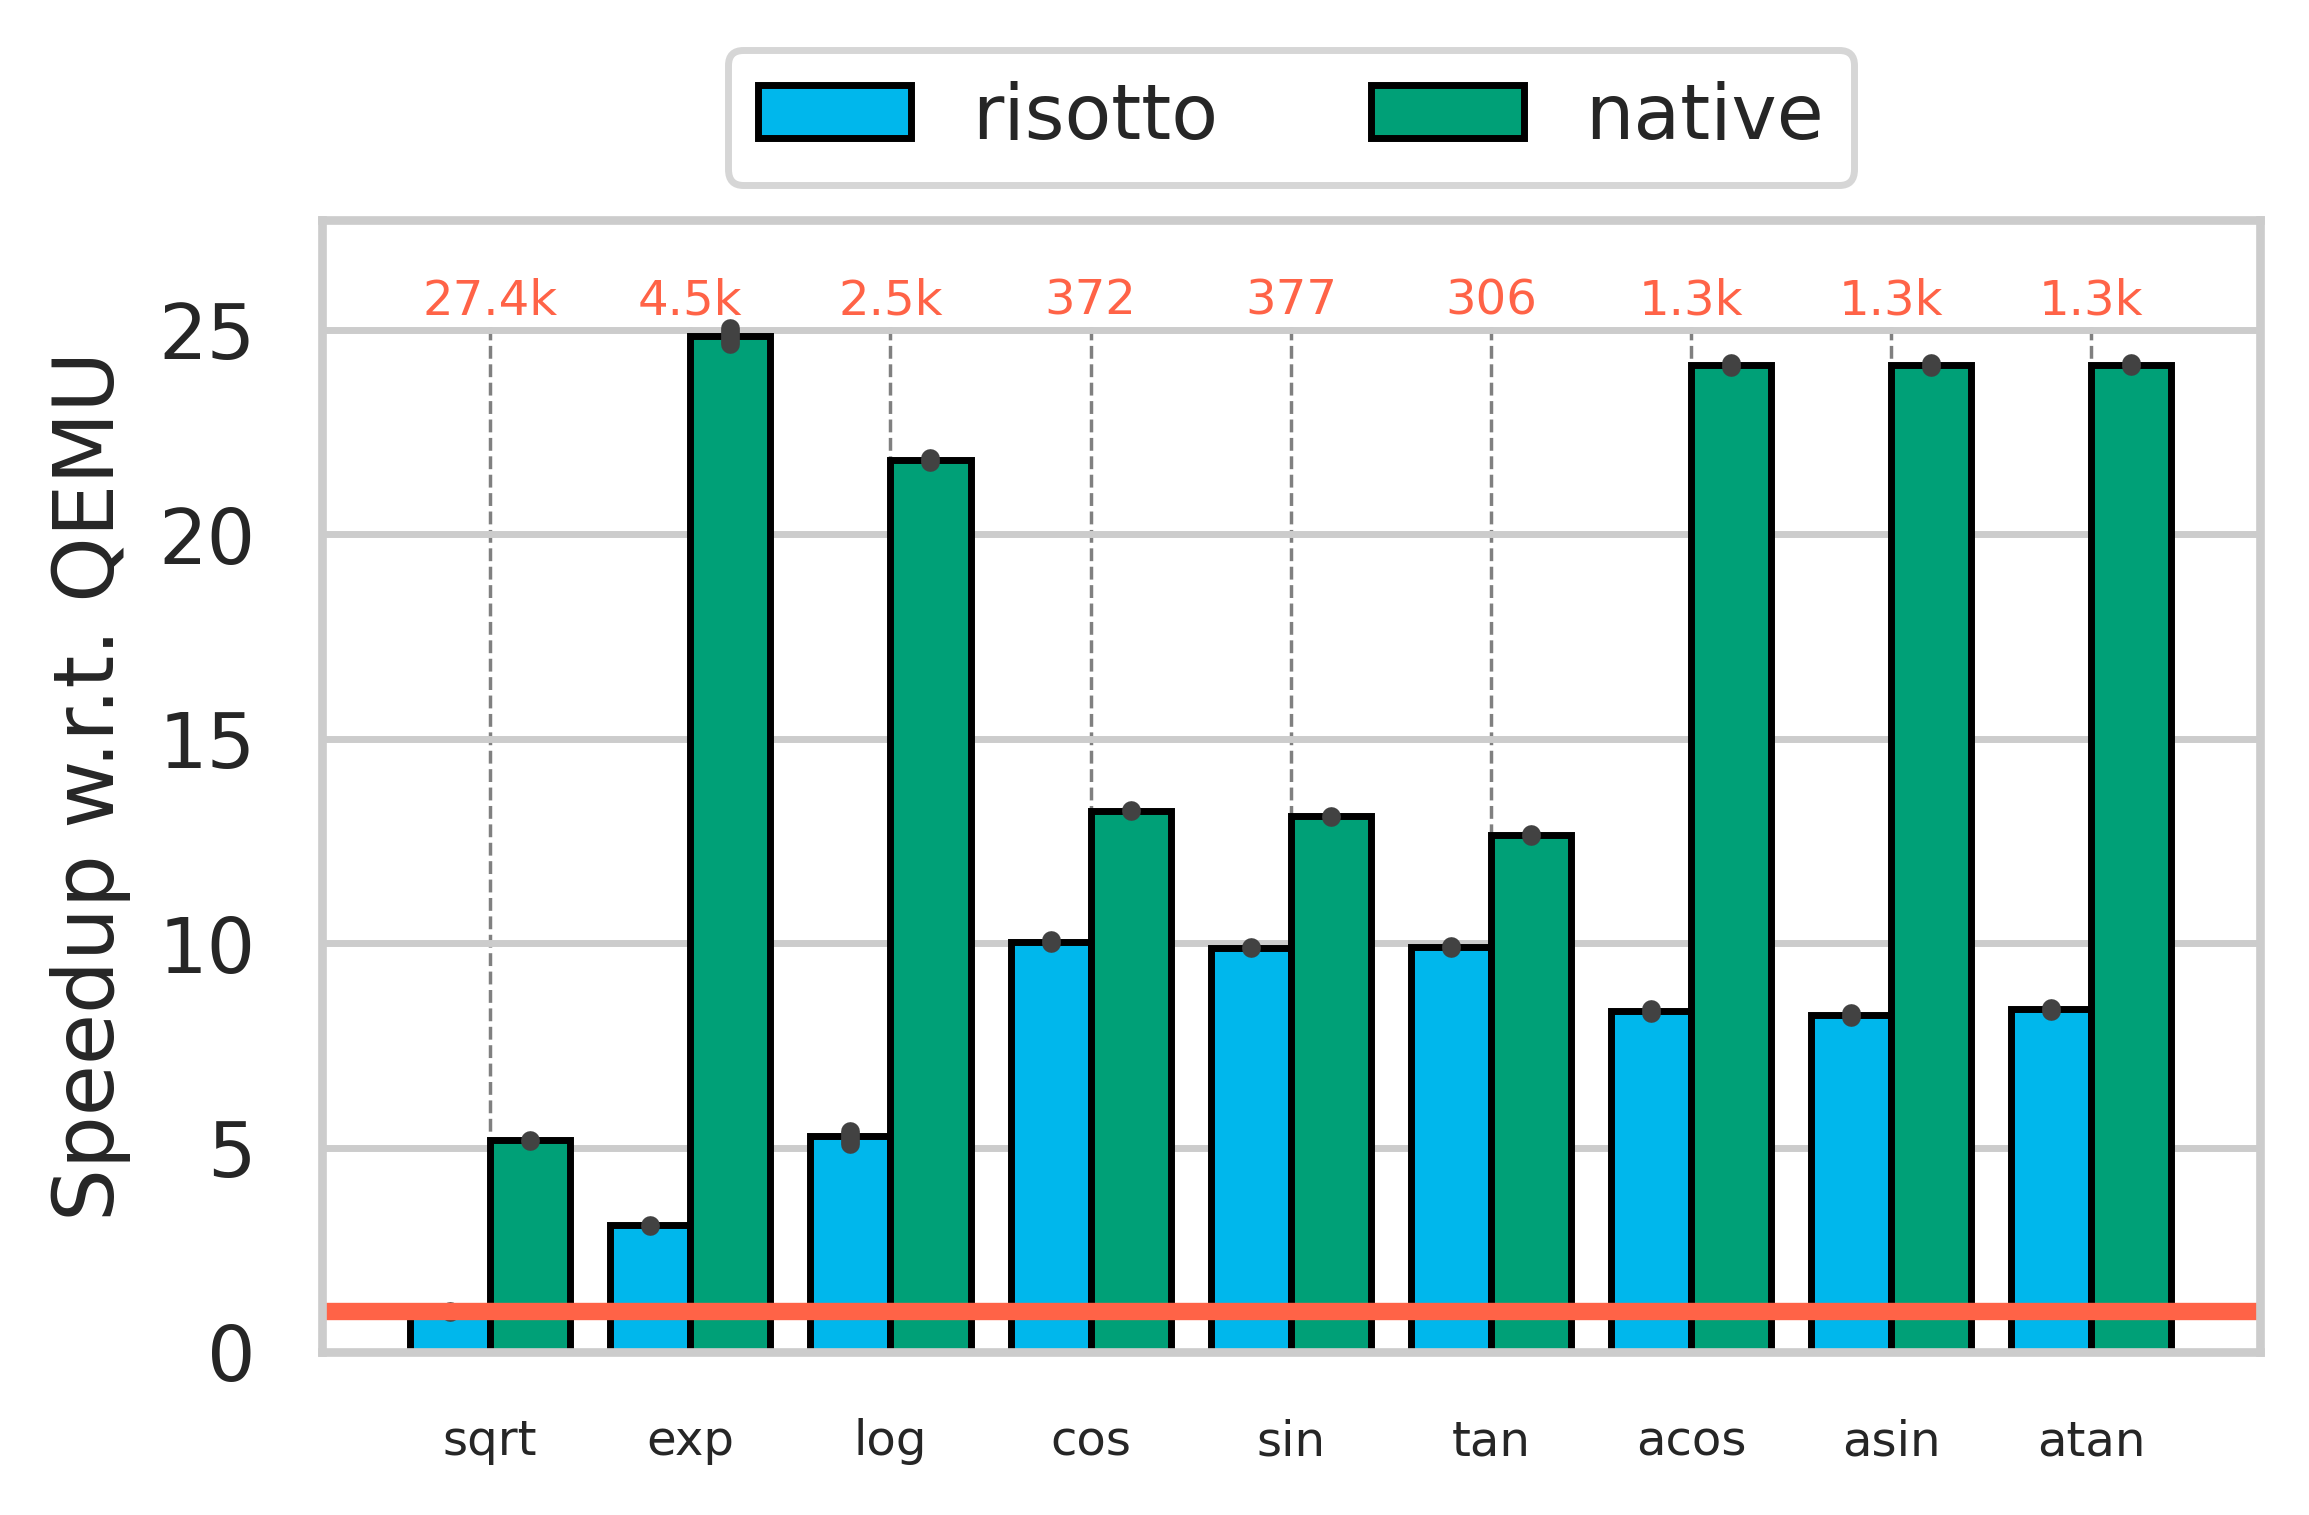

In [23]:
fig = plt.figure(figsize=(5,3), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
order = [ 'sqrt', 'exp', 'log', 'cos', 'sin', 'tan', 'acos', 'asin', 'atan' ]
ax = sbs.barplot(data=df_norm, x='bench', y='norm', hue='label',
                 hue_order=['risotto', 'native'], order=order)
plt.grid(visible=True, axis='y')
plt.xticks(rotation=0, ha="center", fontsize='xx-small')
plt.xlabel("")
plt.ylabel("Speedup w.r.t. QEMU")
max_val = max(df_norm['norm'].values)
plt.ylim(0, max_val*1.1)
plt.axhline(y=1, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(order):
    bm = base_means[f"micro.math-{value}"]
    if bm > 1000000:
        v = f"{bm / 1000000:.0f}M"
    elif bm > 1000:
        v = f"{bm / 1000:.1f}k"
    else:
        v = f"{bm:.0f}"
    #tmp = max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]
    tmp = df_norm.loc[df_norm['bench'] == value]['norm'].values.mean()
    plt.text(idx, max(tmp+.3, max_val+.2), f"{v}", fontsize='xx-small', color='tomato', ha='center')
plt.vlines(range(0, len(set(base_means))), ymin=0, ymax=max_val, linestyle='dashed', colors='grey', linewidth=.5, zorder=0)

# Set color + hatch
style = {
    'fill': [ True, True ],
    'color': [ palette['sky blue'], palette['bluish green'] ],
    'hatch': [ '', '', ''],
    'edgecolor': [ 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / int(len(base_means)))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])

plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), borderaxespad=0, ncol=2)

In [24]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')

In [11]:
for i in sorted_nicely(base_means):
    print(f"{i:25}: {base_means[i]:>20.1f}")

micro.math-acos          :               1251.7
micro.math-asin          :               1251.6
micro.math-atan          :               1252.0
micro.math-cos           :                371.6
micro.math-exp           :               4542.9
micro.math-log           :               2523.6
micro.math-sin           :                377.0
micro.math-sqrt          :              27391.8
micro.math-tan           :                306.4


In [12]:
print(f"bench{20*' '}    risotto     native")
for b in sorted_nicely(base_means):
    ris = df_norm.loc[(df_norm['bench'] == b[11:]) & (df_norm['tag'] == 'risotto')]
    nat = df_norm.loc[(df_norm['bench'] == b[11:]) & (df_norm['tag'] == 'native')]
    print(f"{b:25} {np.mean(ris['norm'].values):>10.4f} {np.mean(nat['norm'].values):>10.2f}")

bench                        risotto     native
micro.math-acos               8.3429      24.14
micro.math-asin               8.2444      24.13
micro.math-atan               8.3814      24.15
micro.math-cos               10.0395      13.24
micro.math-exp                3.0983      24.84
micro.math-log                5.2761      21.82
micro.math-sin                9.8888      13.11
micro.math-sqrt               0.9936       5.17
micro.math-tan                9.9027      12.65
